In [1]:
import os

import pandas as pd
import pickle as pkl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy

import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel

import theano
import theano.tensor as T

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

import classes.helpers as helpers

In [2]:
# Random state.
RS = 42356

cmap = sns.diverging_palette(10, 240, as_cmap=True)
font = {'weight' : 'bold',
        'size'   : 24}

da_classifier = "DA (2)"
comparison_classifier = "SVM"

### Figure 1

For cloud continuous integration purposes we reduce the amount plotted. Simply change the value below to increase.

In [3]:
plot_count = 500

directory = './data/1/patients/'
file_name = directory + '1_4_5_4_200_0.p'

with open(file_name, 'rb') as f:
    p_array = pkl.load(f)
classes = p_array[:, -1]
print(p_array.shape, classes[(0 == classes)].size, classes[(1 == classes)].size)

X = p_array[:plot_count, :-1]
y = p_array[:plot_count, -1].astype(int)

(10000, 201) 5000 5000


#### A.) Input

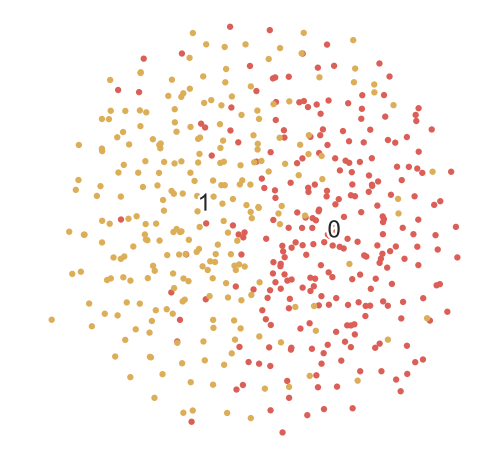

In [4]:
X_tsne = np.vstack([X[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
helpers.scatter(proj2, y_tsne)
plt.savefig('./images/figure_2_a.png')

#### B.) DA 0 Epochs

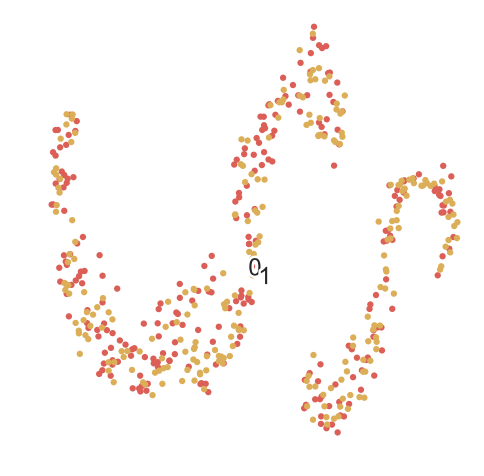

In [5]:
i_theano = T.dmatrix('i_theano')
f = open('./data/1/trained/2_0.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
helpers.scatter(proj2, y_tsne)
plt.savefig('./images/figure_2_b.png')

#### C.) 10 Epochs

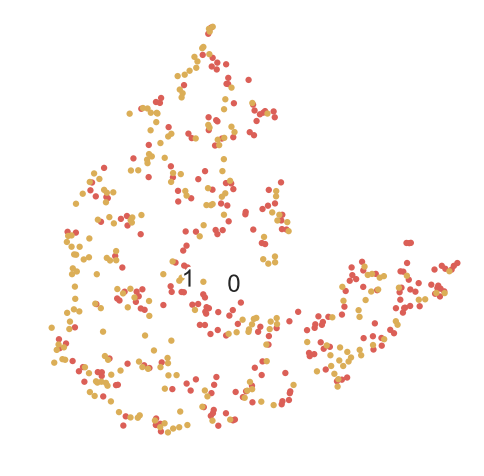

In [6]:
i_theano = T.dmatrix('i_theano')
f = open('./data/1/trained/2_10.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
helpers.scatter(proj2, y_tsne)
plt.savefig('./images/figure_2_c.png')

#### D.) 100 Epochs

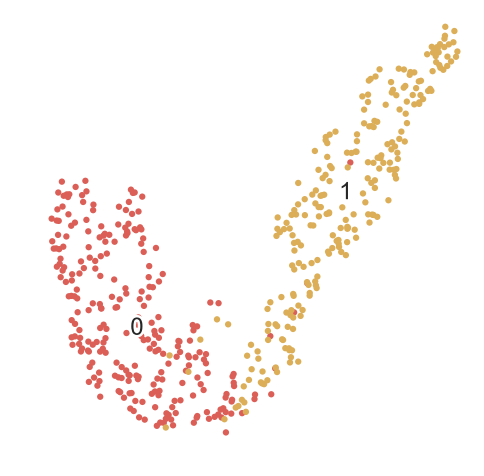

In [7]:
i_theano = T.dmatrix('i_theano')
f = open('./data/1/trained/2_100.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
helpers.scatter(proj2, y_tsne)
plt.savefig('./images/figure_2_d.png')

#### E.) 1,000 Epochs

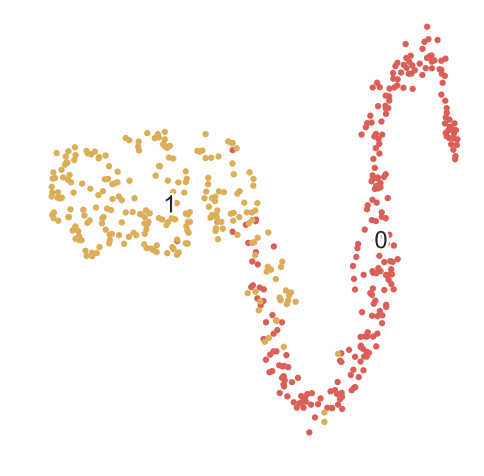

In [8]:
i_theano = T.dmatrix('i_theano')
f = open('./data/1/trained/2_1000.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
helpers.scatter(proj2, y_tsne)
plt.savefig('./images/figure_2_f.png')

### Figure 3
Effect magnitude 2 to clean up noise here

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'effects', 'fullrfc', 'mag',
       'missing', 'model', 'nearest_neighbors', 'observed', 'patients',
       'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
DA (2)


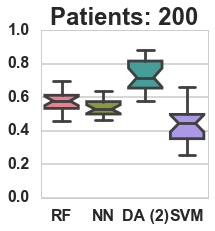

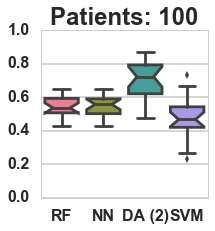

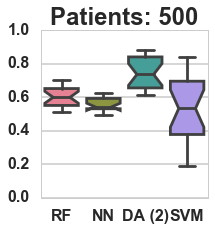

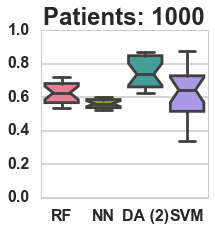

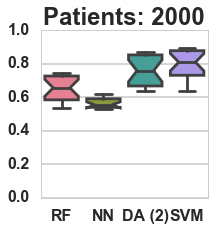

In [21]:
df = helpers.load_data('1')

print(da_classifier)

for p in df['patients'].unique():
    df_select = df.loc[(df['patients'] == p) & (df['mag'] == 2) & 
                       (df['observed'] == 400)]
    four_col = df_select[['Random Forest', 'Nearest Neighbors', 'DA (2)', 'SVM']] #, 'da_2000_2_tree', 'svm']]
    four_col = four_col.rename(columns={'Random Forest':'RF', 'DA (10000)':'DA',
                       'Nearest Neighbors': 'NN', 'svm': 'SVM'})
    
    plt.figure(figsize=(3,3), )
    plt.rc('font', **font)
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=four_col, notch=True, palette="husl")
    g.set_ylim([0, 1])
    g.set_title('Patients: ' + str(p), fontdict=font)
    plt.savefig('./images/figure_3_patients_' + str(p) + '.png')

### Figure 4

#### Figure 4A

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
RF        0.756767
NN        0.684536
SVM       0.696981
DA (8)    0.833889
DA (4)    0.849974
DA (2)    0.694782
dtype: float64


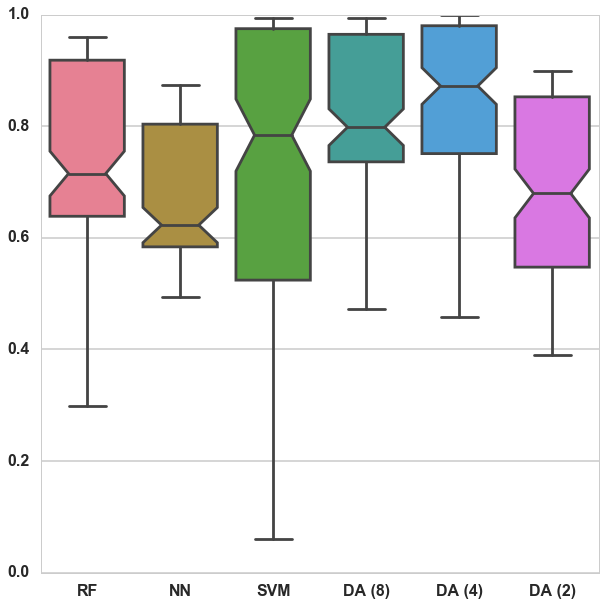

In [10]:
df = helpers.load_data('2')
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier, 
               'DA (8)', 'DA (4)', 'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})
results_df = four_col.loc[(four_col['effects'] == 2)]
results_df.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

print(results_df.mean())
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)
plt.savefig('./images/figure_4_a.png')

#### Figure 4B

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
(240, 9)
(60, 6)
(120, 6)
(180, 6)
(240, 6)
RF        0.739187
NN        0.713393
SVM       0.700780
DA (8)    0.777513
DA (4)    0.788780
DA (2)    0.750169
dtype: float64


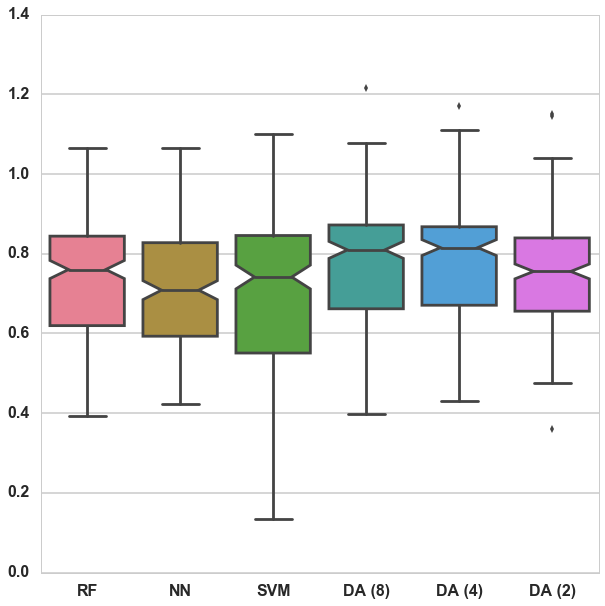

In [11]:
df = helpers.load_data('3')
# Randomness 
expected_e = {1:1, 2: 1, 4:0.6875, 8:0.64, 16:0.6}
results_df = pd.DataFrame()
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (8)', 'DA (4)', 'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

print(four_col.shape)
for e in four_col['effects'].unique():
    df_select = four_col.loc[(four_col['effects'] == e)]
    df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

    results_df = pd.concat([results_df, (df_select / expected_e[e])])
    print(results_df.shape)

print(results_df.mean())
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)
plt.savefig('./images/figure_4_b.png')

#### Figure 4C

Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


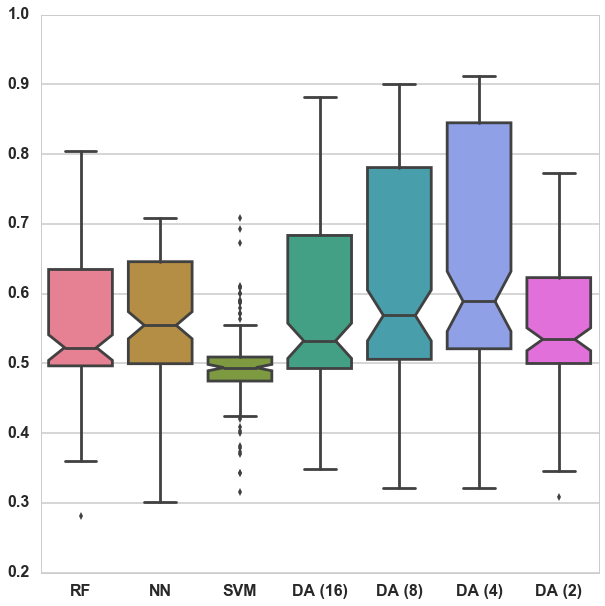

In [12]:
df = helpers.load_data('4')

results_df = pd.DataFrame()
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (16)', 'DA (8)', 'DA (4)',
                   'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

df_select = four_col
df_select = four_col.loc[(four_col['effects'] <= 4)]
df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

results_df = pd.concat([results_df, (df_select)])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)
plt.savefig('./images/figure_4_c.png')

#### Figure 4D

Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


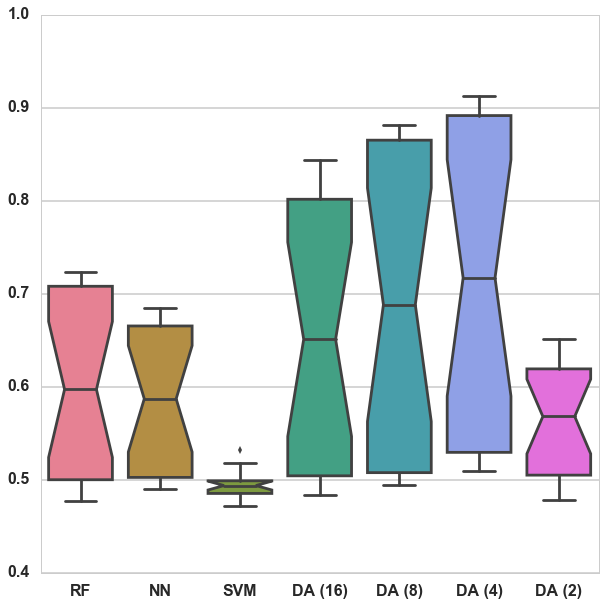

In [13]:
df = helpers.load_data('4')

results_df = pd.DataFrame()
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (16)', 'DA (8)', 'DA (4)',
                   'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

df_select = four_col
df_select = four_col.loc[(four_col['effects'] <= 4) & (four_col['patients'] == 2000)]
df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

results_df = pd.concat([results_df, (df_select)])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)
plt.savefig('./images/figure_4_c.png')

### Figure 5

In [14]:
# Redefine Scatter for 3 classes
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(3):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

RS = 123
plot_count = 600
directory = './data/5/patients/'
file_name = directory + '5_8_5_5_200_0.p'

with open(file_name, 'rb') as f:
    p_array = pkl.load(f)
classes = p_array[:, -1]
print(p_array.shape, classes[(0 == classes)].size, classes[(1 == classes)].size)

X = p_array[:plot_count, :-1]
y = p_array[:plot_count, -1].astype(int)

(15000, 201) 5000 5000


#### A. ) Figure 5A Raw Input 

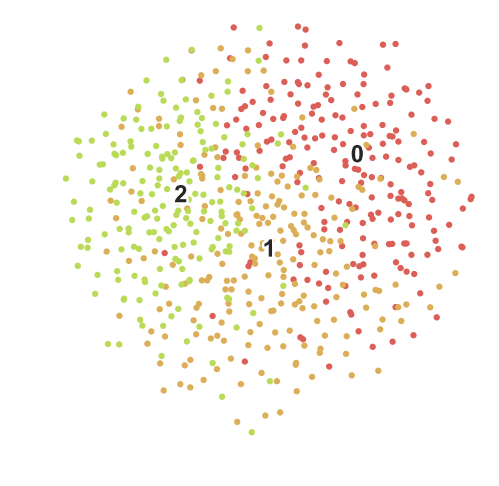

In [15]:
X_tsne = np.vstack([X[y==i]
               for i in range(3)])
y_tsne = np.hstack([y[y==i]
               for i in range(3)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)
plt.savefig('./images/figure_5_a.png')

#### B. ) Figure 5B - 2 hidden nodes

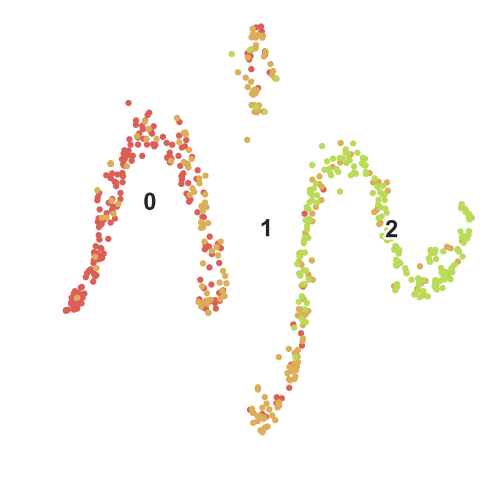

In [16]:
i_theano = T.dmatrix('i_theano')
f = open('./data/5/trained/2_1000.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(3)])
y_tsne = np.hstack([y[y==i]
               for i in range(3)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)
plt.savefig('./images/figure_5_b.png')

#### C. ) Figure 5C - 3 hidden nodes

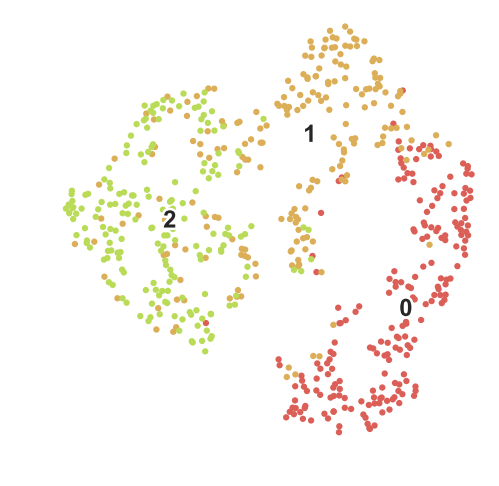

In [17]:
i_theano = T.dmatrix('i_theano')
f = open('./data/5/trained/3_1000.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(3)])
y_tsne = np.hstack([y[y==i]
               for i in range(3)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)
plt.savefig('./images/figure_5_c.png')

#### D. ) Figure 5D - 4 hidden nodes

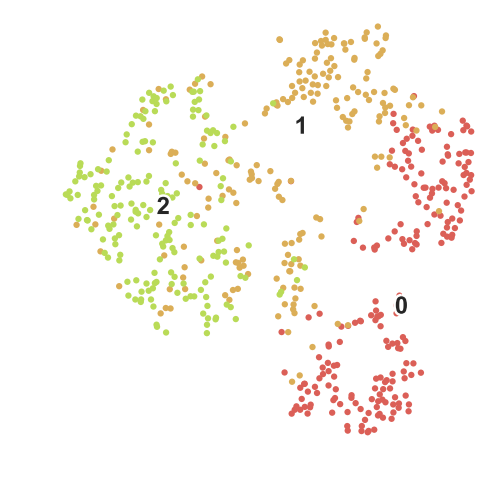

In [18]:
i_theano = T.dmatrix('i_theano')
f = open('./data/5/trained/4_1000.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(3)])
y_tsne = np.hstack([y[y==i]
               for i in range(3)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)
plt.savefig('./images/figure_5_d.png')

### Supplemental Figure 4A

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'effects', 'fullrfc', 'mag',
       'missing', 'model', 'nearest_neighbors', 'observed', 'patients',
       'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


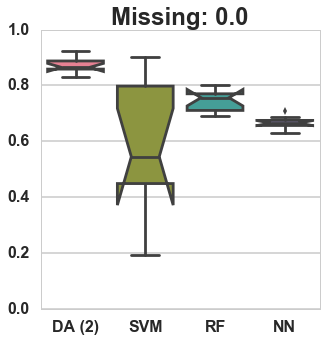

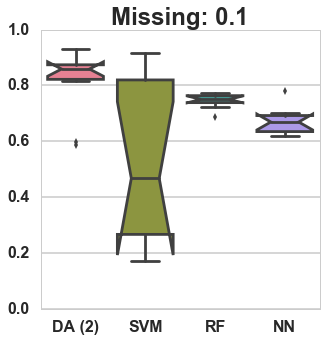

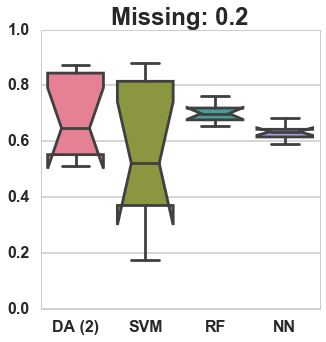

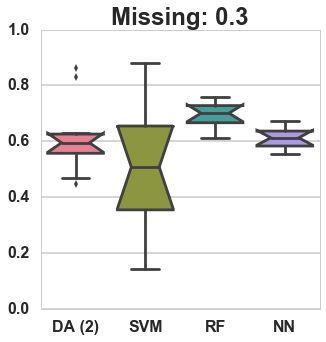

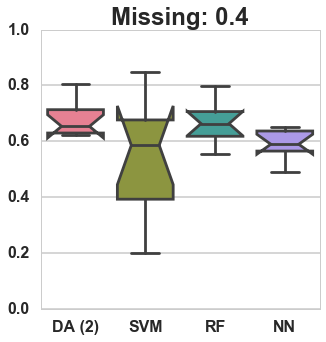

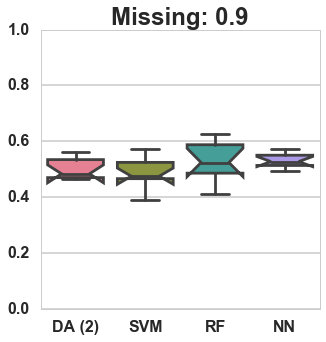

In [26]:
df = helpers.load_data('md_1')

# print(df.shape)
# print(df[['missing', 'diff']])

hidden_nodes = [1, 2, 4, 8, 16]
da_classifier_list = []
for n in hidden_nodes:
    da = 'DA (' + str(n) + ')'
    if (da in df.columns):
        da_classifier_list.append(da)

methods = da_classifier_list + [comparison_classifier, 'RF', 'NN']
for m in df['missing'].unique():
    df = df.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})
    df_select = df.loc[(df['missing'] == m)] # & (df['effects'] == 2)]
    vals = df_select[methods]
    plt.figure(figsize=(5,5))
    plt.rc('font', **font)
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=vals, notch=True, palette="husl")
    g.set_title('Missing: ' + str(m), fontdict=font)
    g.set_ylim([0, 1])
    plt.savefig('./images/supp_figure_4_a_' + str(m) + '.png')

### Supplemental Figure 4B

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'effects', 'fullrfc', 'mag',
       'missing', 'model', 'nearest_neighbors', 'observed', 'patients',
       'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


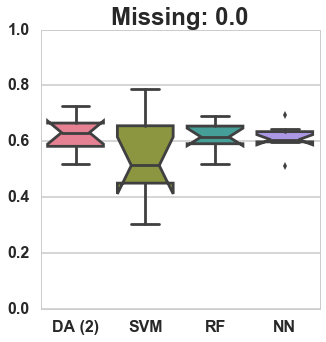

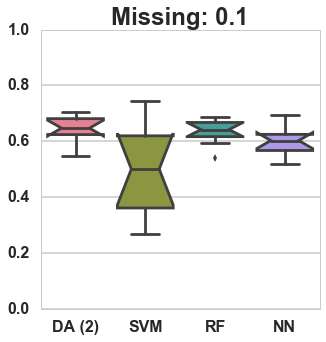

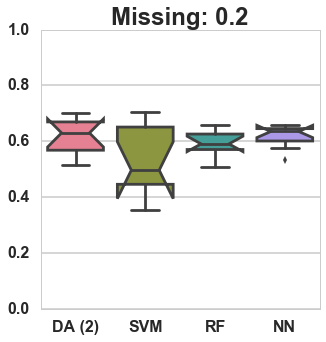

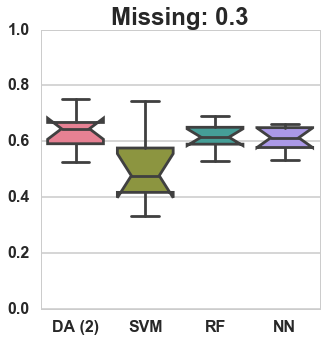

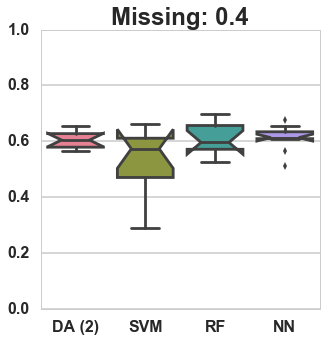

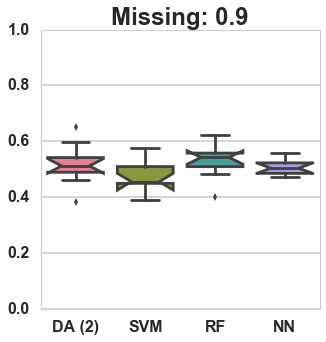

In [27]:
df = helpers.load_data('md_3')

# print(df.shape)
# print(df[['missing', 'diff']])

hidden_nodes = [1, 2, 4, 8, 16]
da_classifier_list = []
for n in hidden_nodes:
    da = 'DA (' + str(n) + ')'
    if (da in df.columns):
        da_classifier_list.append(da)

methods = da_classifier_list + [comparison_classifier, 'RF', 'NN']
for m in df['missing'].unique():
    df = df.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})
    df_select = df.loc[(df['missing'] == m)] # & (df['effects'] == 2)]
    vals = df_select[methods]
    plt.figure(figsize=(5,5))
    plt.rc('font', **font)
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=vals, notch=True, palette="husl")
    g.set_title('Missing: ' + str(m), fontdict=font)
    g.set_ylim([0, 1])
    plt.savefig('./images/supp_figure_4_b_' + str(m) + '.png')